In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
dlhl = pd.read_csv('C:\\Users\\84346\\Desktop\\Data\\adult.data.csv')
dlkt = pd.read_csv('C:\\Users\\84346\\Desktop\\Data\\adult.test.csv')

In [3]:
dlhl

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Lam sach du lieu huan luyen
dlhl1 = dlhl.copy() 
dlhl1 = dlhl1.replace(' ?', '')
dlhl1 = dlhl1.replace(r'^s*$', float('NaN'), regex = True)

In [5]:
dlhl2 = dlhl1.copy()
dlhl2 = dlhl2.dropna()

In [6]:
#Lam sach du kiem thu
dlkt1 = dlkt.copy() 
dlkt1 = dlkt1.replace(' ?', '')
dlkt1 = dlkt1.replace(r'^s*$', float('NaN'), regex = True)
#xóa
dlkt2 = dlkt1.copy()
dlkt2 = dlkt2.dropna()

In [7]:
print("Number of training data:", len(dlhl2))
print("Number of test data: ",len(dlkt2))

Number of training data: 30162
Number of test data:  15060


In [8]:
dlhl2 = dlhl2.drop(['fnlwgt'], axis=1)

In [9]:
data = pd.concat([dlhl2,dlkt2])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


<AxesSubplot:>

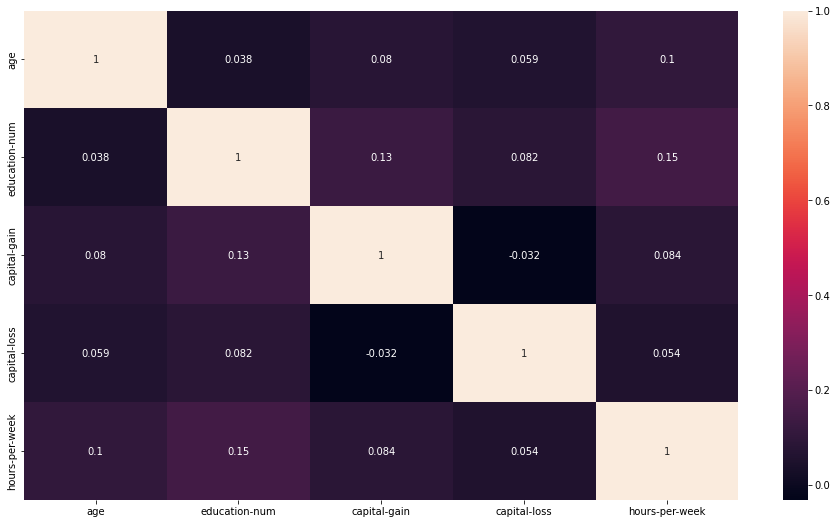

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method = "pearson"), annot=True)

In [12]:
features = data.drop('income', axis=1)
labels = data['income']

In [13]:
labels

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
16275     <=50K
16276     <=50K
16278     <=50K
16279     <=50K
16280      >50K
Name: income, Length: 45222, dtype: object

In [14]:
features

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [15]:
features.select_dtypes(exclude=["int64"]).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [16]:
features_onehot = pd.get_dummies(features, features.select_dtypes(exclude=["int64"]).columns)
features_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16276,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)

print("Decision Tree Accuracy: ", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred))

Decision Tree Accuracy:  0.8175298804780876
Report:                precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



In [20]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy score 0.8175298804780876')

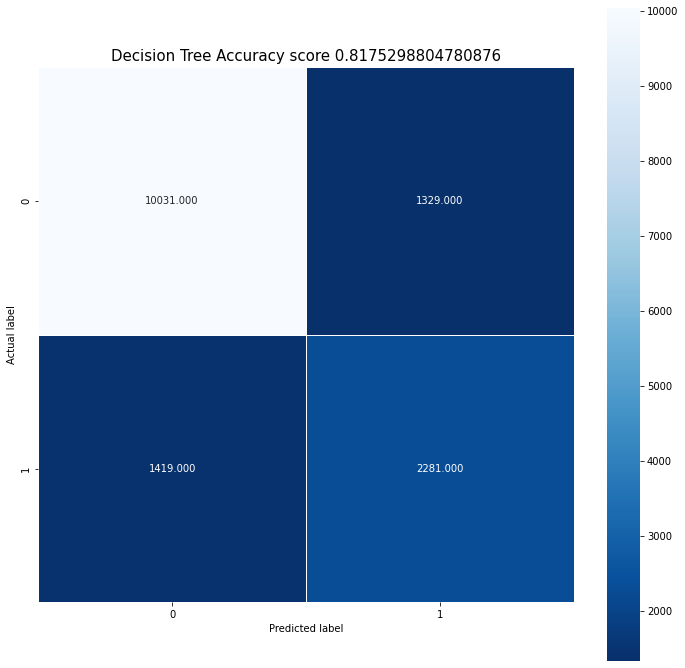

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = "Decision Tree Accuracy score {0}".format(tree_score)
plt.title(title, size=15)

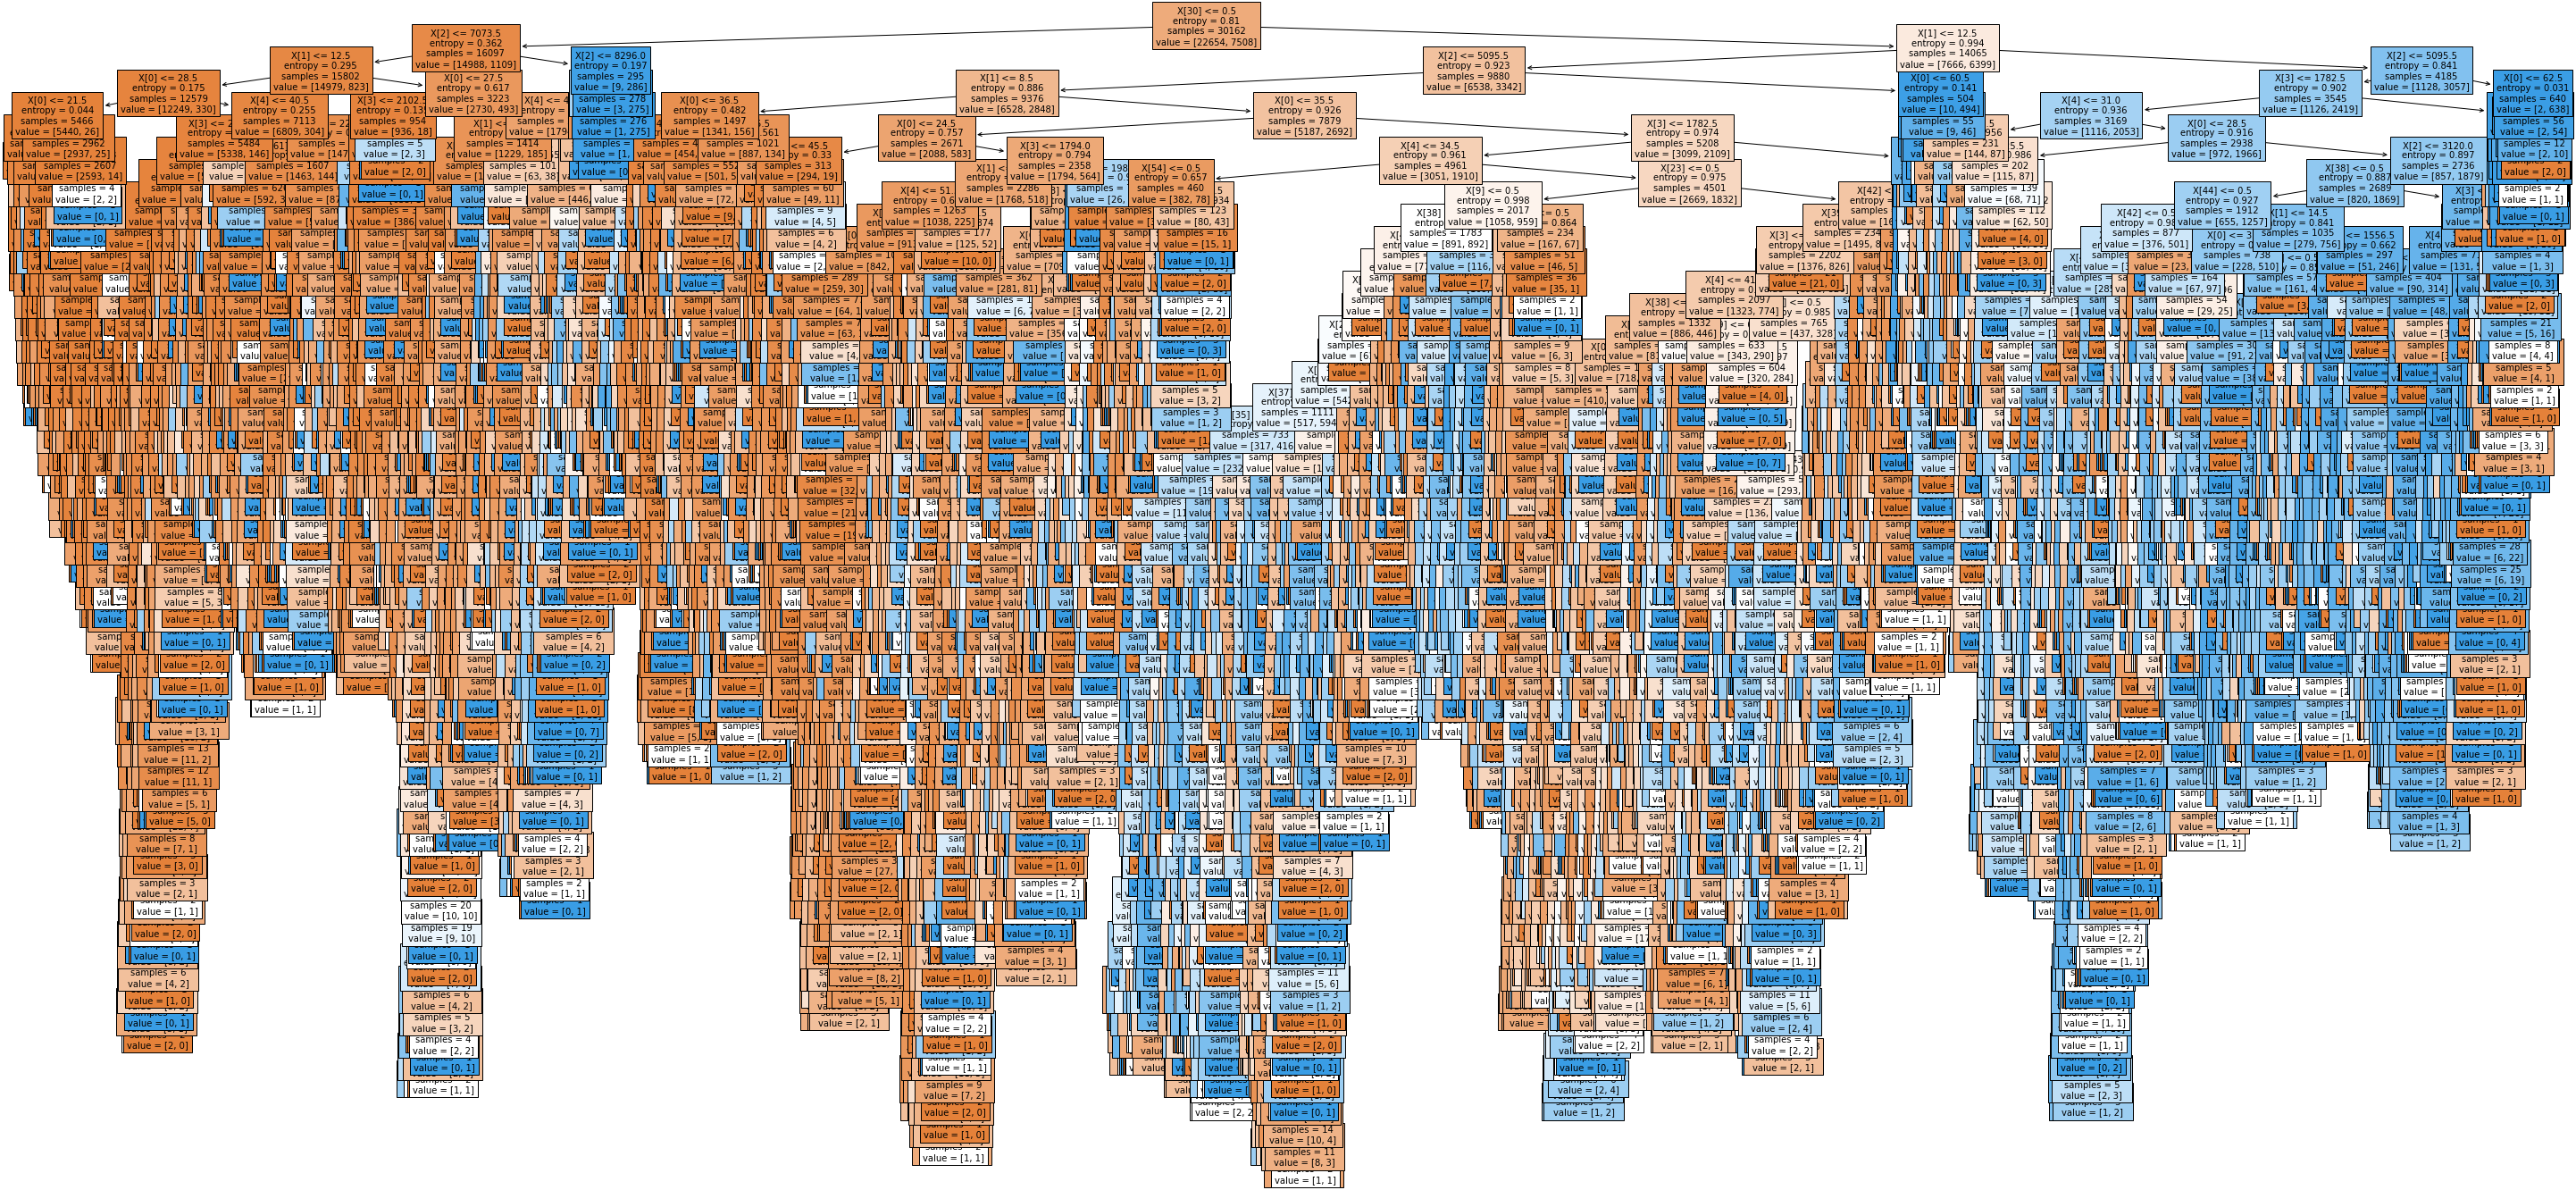

In [22]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig("decision_tree", dpi=100)
plt.show()

In [23]:
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

In [24]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
tree_pred = clf1.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)

print("Decision Tree Accuracy: ", tree_score)
print("Decision Tree Classification Report: ", metrics.classification_report(y_test, tree_pred))

Decision Tree Accuracy:  0.8122841965471448
Decision Tree Classification Report:                precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



In [26]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy score 0.8122841965471448')

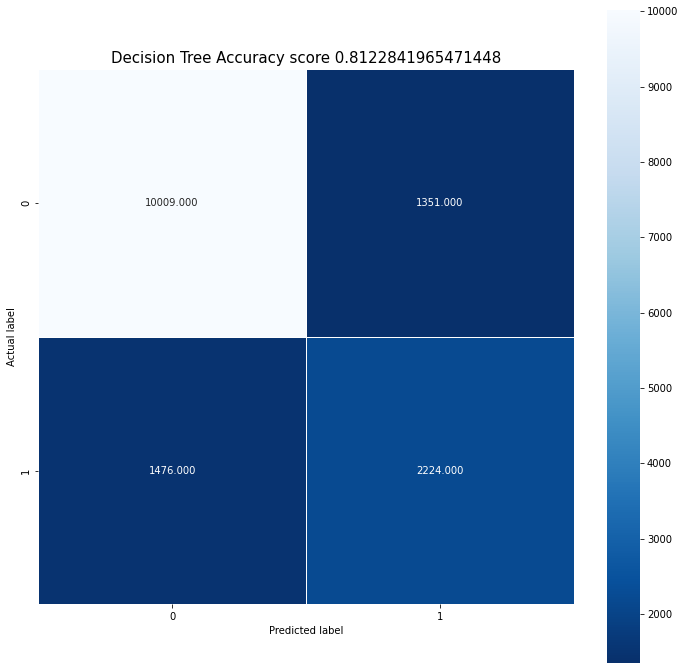

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = "Decision Tree Accuracy score {0}".format(tree_score)
plt.title(title, size=15)

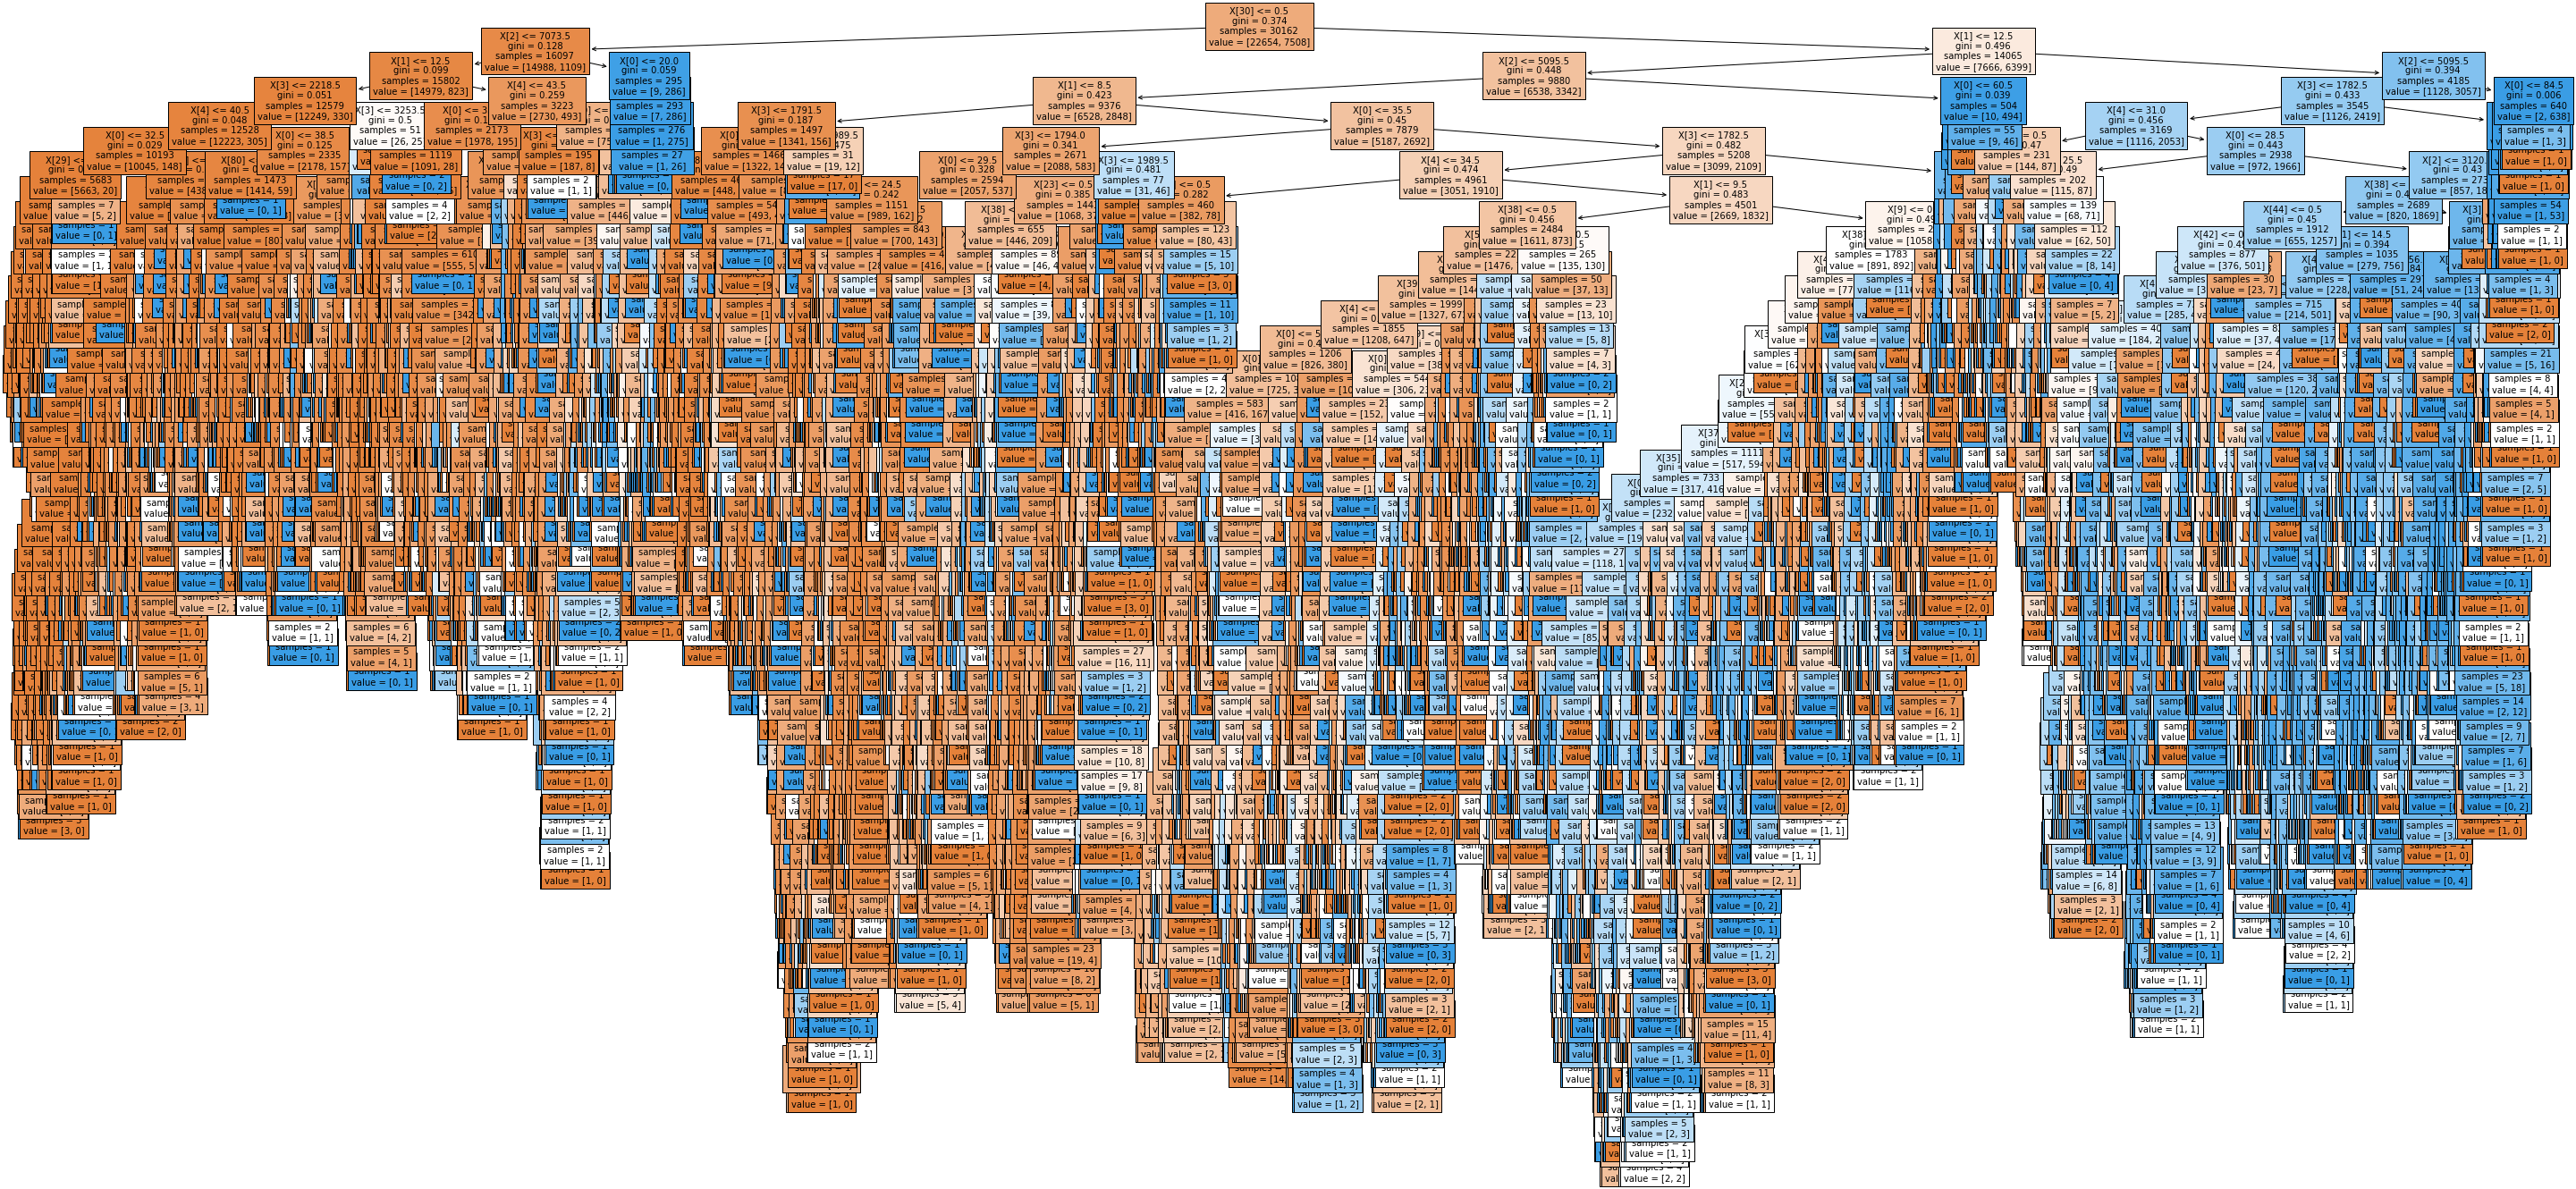

In [28]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf1, filled=True, fontsize=10)
plt.savefig("decision_tree_2", dpi=100)
plt.show()

In [29]:
#9.Naive Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [30]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Naive Bayes Accuracy: ", bayes_score)
print("Naive Bayes Classification Report: ", metrics.classification_report(y_test, bayes_pred))

Naive Bayes Accuracy:  0.8029216467463479
Naive Bayes Classification Report:                precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



Text(0.5, 1.0, 'Naive Bayes Accuracy score 0.8029216467463479')

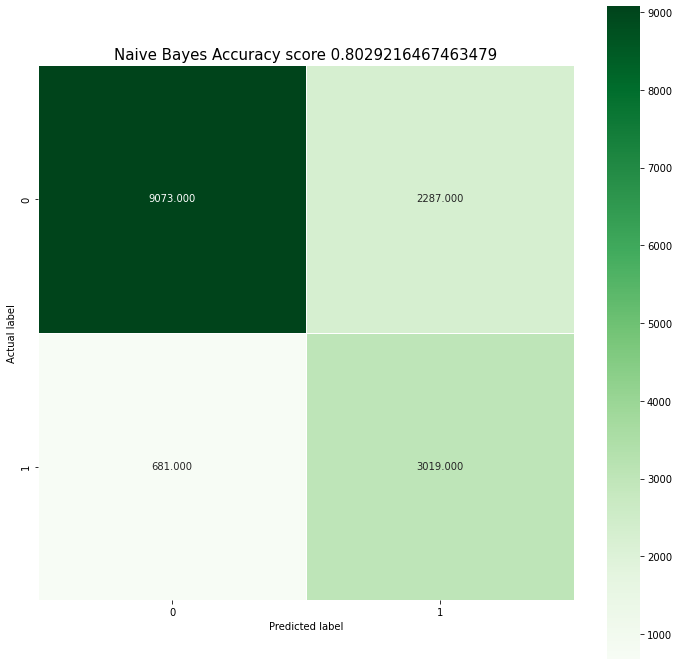

In [31]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = "Naive Bayes Accuracy score {0}".format(bayes_score)
plt.title(title, size=15)

In [ ]:
#Nhận xét:
# Ta thấy Naive Bayes Accuracy= 0.803 mà Decision Tree Accuracy=  0.8122841965471448
# nên ta có thể kết luận được mô hình được xây dựng bởi thuật toán Naive Bayes có độ chính xác thấp hơn thuật toán Decision Tree